In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/mobile_addiction.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Shape: (13589, 12)

First 5 rows:
   user_id  daily_screen_time  app_sessions  social_media_usage  gaming_time  \
0        0                  2            29                   0            0   
1        1                  6            29                   1            2   
2        2                  9            28                   2            0   
3        3                  6            39                   2            0   
4        4                  5            37                   3            1   

   notifications  night_usage  age  work_study_hours  stress_level  \
0             49            0   44                 5             3   
1             65            1   29                 5             9   
2             57            3   28                 7             5   
3             69            1   28                 6             8   
4             64            2   27                 4             5   

   apps_installed      addicted  
0              35  not

Target Variable Distribution:
addicted
addicted        6846
not addicted    6743
Name: count, dtype: int64

Target Variable Percentage:
addicted
addicted        50.378983
not addicted    49.621017
Name: proportion, dtype: float64


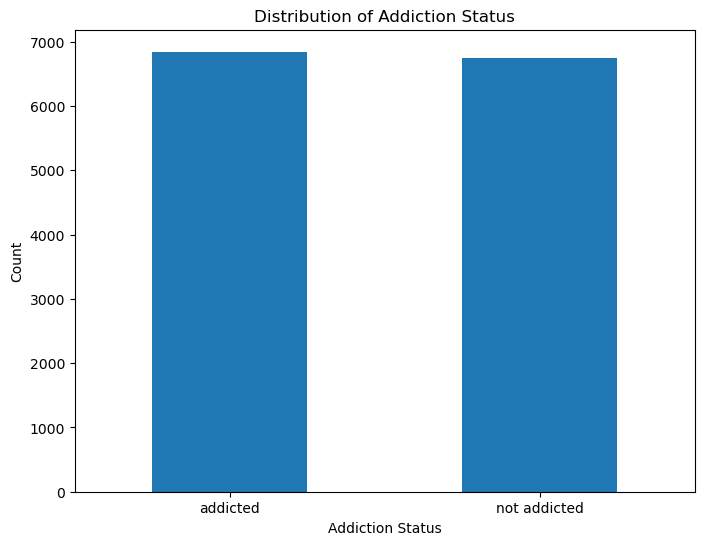

In [3]:
print("Target Variable Distribution:")
print(df['addicted'].value_counts())
print("\nTarget Variable Percentage:")
print(df['addicted'].value_counts(normalize=True) * 100)

# Visualize target distribution
plt.figure(figsize=(8, 6))
df['addicted'].value_counts().plot(kind='bar')
plt.title('Distribution of Addiction Status')
plt.xlabel('Addiction Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Statistical Summary of Numerical Features:
            user_id  daily_screen_time  app_sessions  social_media_usage  \
count  13589.000000       13589.000000  13589.000000        13589.000000   
mean    6794.000000           3.768121     30.037604            1.545956   
std     3922.950739           1.897280      7.406585            1.204830   
min        0.000000           0.000000      8.000000            0.000000   
25%     3397.000000           2.000000     25.000000            1.000000   
50%     6794.000000           4.000000     30.000000            1.000000   
75%    10191.000000           5.000000     35.000000            2.000000   
max    13588.000000          12.000000     60.000000            7.000000   

        gaming_time  notifications   night_usage           age  \
count  13589.000000   13589.000000  13589.000000  13589.000000   
mean       1.034219      60.015306      0.990213     33.055707   
std        0.993172      12.732064      0.946606     10.118145   
min     

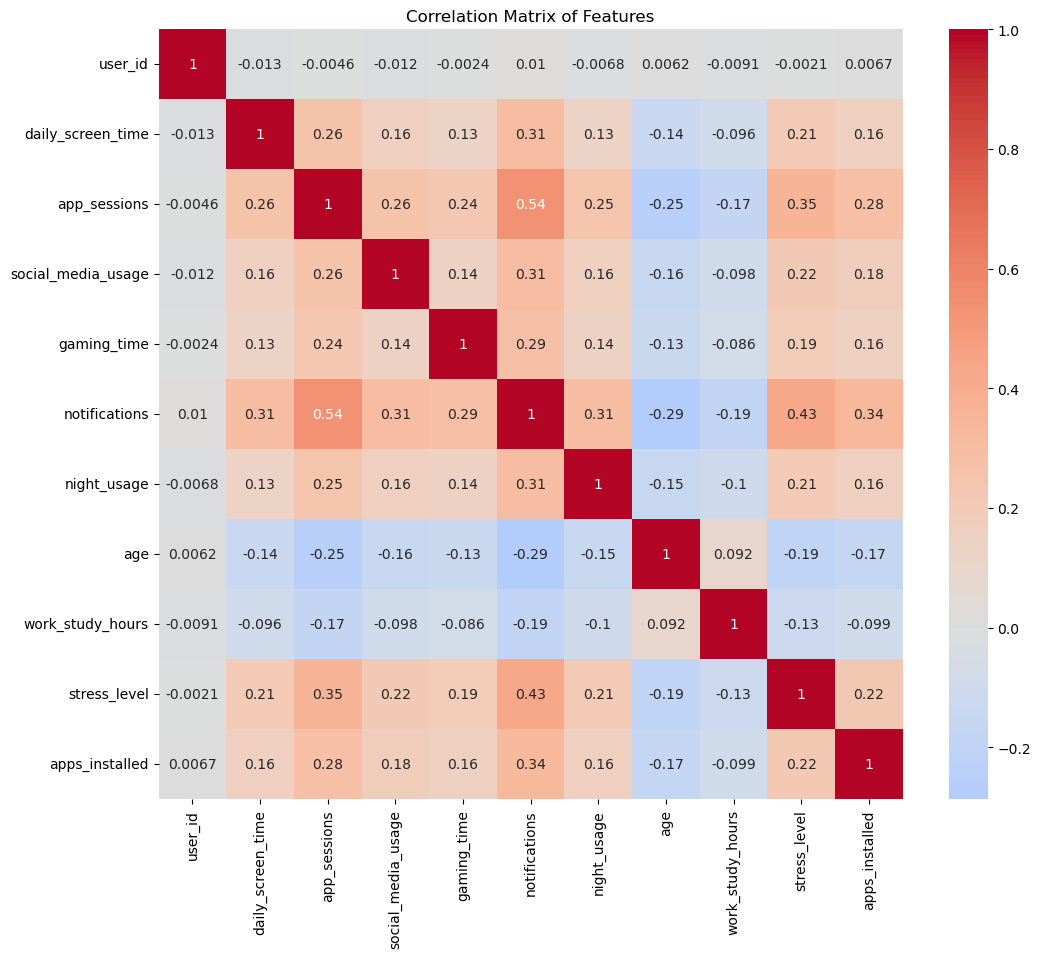

In [4]:
# Statistical summary
print("Statistical Summary of Numerical Features:")
print(df.describe())

# Correlation matrix
plt.figure(figsize=(12, 10))
# Select only numerical columns for correlation
numerical_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Features')
plt.show()


In [5]:
# Encode target variable
le = LabelEncoder()
df['addicted_encoded'] = le.fit_transform(df['addicted'])

# Select features (X) and target (y)
# Exclude user_id as it's not a predictive feature
feature_columns = ['daily_screen_time', 'app_sessions', 'social_media_usage', 
                   'gaming_time', 'notifications', 'night_usage', 'age', 
                   'work_study_hours', 'stress_level', 'apps_installed']

X = df[feature_columns]
y = df['addicted_encoded']

print("Selected Features:")
print(feature_columns)
print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

Selected Features:
['daily_screen_time', 'app_sessions', 'social_media_usage', 'gaming_time', 'notifications', 'night_usage', 'age', 'work_study_hours', 'stress_level', 'apps_installed']

Feature matrix shape: (13589, 10)
Target vector shape: (13589,)


In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")
print(f"Training set target distribution:\n{pd.Series(y_train).value_counts()}")
print(f"Testing set target distribution:\n{pd.Series(y_test).value_counts()}")


Training set size: 10871
Testing set size: 2718
Training set target distribution:
addicted_encoded
0    5477
1    5394
Name: count, dtype: int64
Testing set target distribution:
addicted_encoded
0    1369
1    1349
Name: count, dtype: int64


In [7]:
# Scale the features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed.")
print(f"Original feature range example (daily_screen_time): {X_train['daily_screen_time'].min()} to {X_train['daily_screen_time'].max()}")
print(f"Scaled feature range example: {X_train_scaled[:, 0].min():.2f} to {X_train_scaled[:, 0].max():.2f}")


Feature scaling completed.
Original feature range example (daily_screen_time): 0 to 12
Scaled feature range example: -1.98 to 4.33


In [8]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance (Random Forest):")
print(feature_importance)


Random Forest Accuracy: 0.9783

Feature Importance (Random Forest):
              feature  importance
4       notifications    0.471900
1        app_sessions    0.202478
8        stress_level    0.106255
6                 age    0.077241
9      apps_installed    0.048250
0   daily_screen_time    0.026012
2  social_media_usage    0.024207
3         gaming_time    0.016767
5         night_usage    0.015318
7    work_study_hours    0.011572


In [9]:
# Train Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Make predictions
lr_pred = lr_model.predict(X_test_scaled)

# Calculate accuracy
lr_accuracy = accuracy_score(y_test, lr_pred)
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")


Logistic Regression Accuracy: 0.9783


In [10]:
# Train SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions
svm_pred = svm_model.predict(X_test_scaled)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f"SVM Accuracy: {svm_accuracy:.4f}")


SVM Accuracy: 0.9812


In [11]:
# Compare all models
model_comparison = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression', 'SVM'],
    'Accuracy': [rf_accuracy, lr_accuracy, svm_accuracy]
}).sort_values('Accuracy', ascending=False)

print("Model Comparison:")
print(model_comparison)

# Select best model
best_model_name = model_comparison.iloc[0]['Model']
best_accuracy = model_comparison.iloc[0]['Accuracy']

print(f"\nBest Model: {best_model_name}")
print(f"Best Accuracy: {best_accuracy:.4f}")


Model Comparison:
                 Model  Accuracy
2                  SVM  0.981236
0        Random Forest  0.978293
1  Logistic Regression  0.978293

Best Model: SVM
Best Accuracy: 0.9812


Detailed Classification Report for SVM:
              precision    recall  f1-score   support

Not Addicted       0.98      0.98      0.98      1369
    Addicted       0.98      0.98      0.98      1349

    accuracy                           0.98      2718
   macro avg       0.98      0.98      0.98      2718
weighted avg       0.98      0.98      0.98      2718



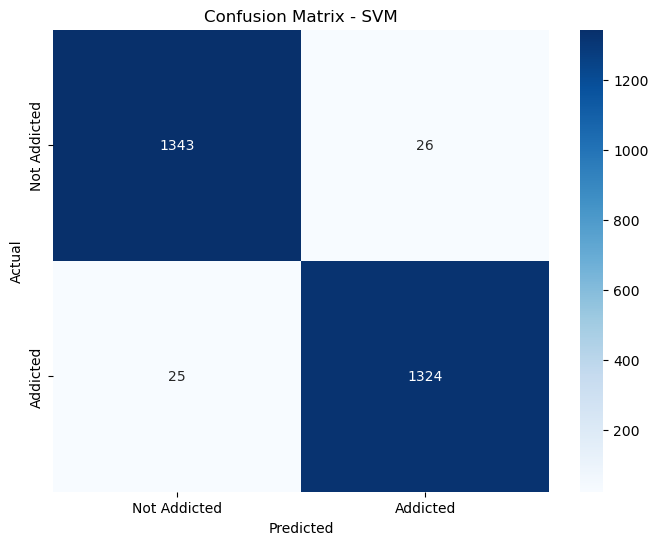

In [12]:
# Determine which model performed best and show detailed metrics
if best_model_name == 'Random Forest':
    best_model = rf_model
    best_pred = rf_pred
    X_test_final = X_test
elif best_model_name == 'Logistic Regression':
    best_model = lr_model
    best_pred = lr_pred
    X_test_final = X_test_scaled
else:
    best_model = svm_model
    best_pred = svm_pred
    X_test_final = X_test_scaled

# Detailed classification report
print(f"Detailed Classification Report for {best_model_name}:")
print(classification_report(y_test, best_pred, target_names=['Not Addicted', 'Addicted']))

# Confusion Matrix
cm = confusion_matrix(y_test, best_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Addicted', 'Addicted'],
            yticklabels=['Not Addicted', 'Addicted'])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [13]:
if best_model_name == 'Random Forest':
    # Plot feature importance
    plt.figure(figsize=(10, 8))
    feature_importance_sorted = feature_importance.sort_values('importance')
    plt.barh(range(len(feature_importance_sorted)), feature_importance_sorted['importance'])
    plt.yticks(range(len(feature_importance_sorted)), feature_importance_sorted['feature'])
    plt.xlabel('Feature Importance')
    plt.title('Feature Importance - Random Forest')
    plt.tight_layout()
    plt.show()
    
    print("Top 5 Most Important Features:")
    print(feature_importance.head())


In [14]:
print("="*50)
print("MOBILE ADDICTION PREDICTION MODEL - FINAL RESULTS")
print("="*50)
print(f"Dataset Size: {df.shape[0]} samples, {len(feature_columns)} features")
print(f"Training Set: {X_train.shape[0]} samples")
print(f"Testing Set: {X_test.shape[0]} samples")
print("\nModel Performance:")
for i, row in model_comparison.iterrows():
    print(f"{row['Model']}: {row['Accuracy']:.4f} ({row['Accuracy']*100:.2f}%)")

print(f"\nBest Performing Model: {best_model_name}")
print(f"Final Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")

# Additional insights
addicted_count = df['addicted'].value_counts()['addicted']
not_addicted_count = df['addicted'].value_counts()['not addicted']
print(f"\nDataset Balance:")
print(f"Addicted: {addicted_count} ({addicted_count/len(df)*100:.1f}%)")
print(f"Not Addicted: {not_addicted_count} ({not_addicted_count/len(df)*100:.1f}%)")

print("\nMost Predictive Features for Mobile Addiction:")
if best_model_name == 'Random Forest':
    top_features = feature_importance.head(3)
    for i, row in top_features.iterrows():
        print(f"{i+1}. {row['feature']}: {row['importance']:.4f}")
        
print("="*50)

MOBILE ADDICTION PREDICTION MODEL - FINAL RESULTS
Dataset Size: 13589 samples, 10 features
Training Set: 10871 samples
Testing Set: 2718 samples

Model Performance:
SVM: 0.9812 (98.12%)
Random Forest: 0.9783 (97.83%)
Logistic Regression: 0.9783 (97.83%)

Best Performing Model: SVM
Final Accuracy: 0.9812 (98.12%)

Dataset Balance:
Addicted: 6846 (50.4%)
Not Addicted: 6743 (49.6%)

Most Predictive Features for Mobile Addiction:


In [15]:
import joblib
import os

# Create directory if it doesn't exist
if not os.path.exists('mobile_models'):
    os.makedirs('mobile_models')
    print("Created 'mobile_models' directory")

# Export the best performing model
if best_model_name == 'Random Forest':
    joblib.dump(rf_model, 'mobile_models/best_model.joblib')
    joblib.dump(X_test, 'mobile_models/sample_data.joblib')  # No scaling needed for RF
    print("Exported Random Forest model (no scaler needed)")
elif best_model_name == 'Logistic Regression':
    joblib.dump(lr_model, 'mobile_models/best_model.joblib')
    joblib.dump(scaler, 'mobile_models/scaler.joblib')
    joblib.dump(X_test_scaled, 'mobile_models/sample_data.joblib')
    print("Exported Logistic Regression model with scaler")
else:  # SVM
    joblib.dump(svm_model, 'mobile_models/best_model.joblib')
    joblib.dump(scaler, 'mobile_models/scaler.joblib')
    joblib.dump(X_test_scaled, 'mobile_models/sample_data.joblib')
    print("Exported SVM model with scaler")

# Export label encoder for target variable
joblib.dump(le, 'mobile_models/label_encoder.joblib')

# Export feature columns list for Flask app
joblib.dump(feature_columns, 'mobile_models/feature_columns.joblib')

# Export model metadata
model_metadata = {
    'best_model_name': best_model_name,
    'best_accuracy': best_accuracy,
    'feature_columns': feature_columns,
    'requires_scaling': best_model_name in ['Logistic Regression', 'SVM'],
    'target_classes': list(le.classes_),
    'model_comparison': model_comparison.to_dict()
}

joblib.dump(model_metadata, 'mobile_models/model_metadata.joblib')

print("\n" + "="*50)
print("MODEL EXPORT COMPLETED SUCCESSFULLY")
print("="*50)
print("Files exported to 'mobile_models' folder:")
print("1. best_model.joblib - The best performing ML model")
print("2. label_encoder.joblib - Target variable encoder")
print("3. feature_columns.joblib - List of required input features")
print("4. model_metadata.joblib - Model information and settings")

if model_metadata['requires_scaling']:
    print("5. scaler.joblib - Feature scaler (required for this model)")
    print("\nNote: This model requires feature scaling before prediction")
else:
    print("\nNote: This model doesn't require feature scaling")

print(f"\nBest Model: {best_model_name}")
print(f"Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")

print("\nFeature Input Order for Flask App:")
for i, feature in enumerate(feature_columns, 1):
    print(f"{i:2d}. {feature}")

Created 'mobile_models' directory
Exported SVM model with scaler

MODEL EXPORT COMPLETED SUCCESSFULLY
Files exported to 'mobile_models' folder:
1. best_model.joblib - The best performing ML model
2. label_encoder.joblib - Target variable encoder
3. feature_columns.joblib - List of required input features
4. model_metadata.joblib - Model information and settings
5. scaler.joblib - Feature scaler (required for this model)

Note: This model requires feature scaling before prediction

Best Model: SVM
Accuracy: 0.9812 (98.12%)

Feature Input Order for Flask App:
 1. daily_screen_time
 2. app_sessions
 3. social_media_usage
 4. gaming_time
 5. notifications
 6. night_usage
 7. age
 8. work_study_hours
 9. stress_level
10. apps_installed
